<a href="https://colab.research.google.com/github/ShunPeng1/Introduction-To-AI-Exercise/blob/main/8-Puzzle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exercise: Visualizing the state space of 8-puzzle game

## Introduction to graphviz

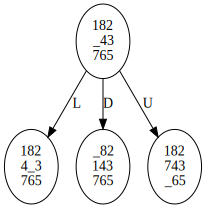

In [15]:
from graphviz import Digraph

dot = Digraph()
dot.node('0', '182\n_43\n765')
dot.node('1', '182\n4_3\n765')
dot.node('2', '_82\n143\n765')
dot.node('3', '182\n743\n_65')
dot.edge('0', '1', 'L')
dot.edge('0', '2', 'D')
dot.edge('0', '3', 'U')

dot

## Defining Node class

Complete TODOs 1 - 3

In [18]:
from copy import deepcopy
from graphviz import Digraph

class Node:

  def __init__(self, state, action = None, parent = None):
    self.state = state # 2D list (3x3)
    self.id = str(self) # identifier of node
    self.action = action
    self.parent = parent

  def __str__(self):
    '''
    # TODO 1
    Return a string representing the state of the node.
    Note to remember the 0 digit by '_'
    e.g., '182\n_43\n765'
    '''
    result = ""
    for i in range(3):
      for j in range(3):
        if (self.state[i][j] != 0) :
          result += str(self.state[i][j])
        else :
          result += "_"
      result += "\n"

    return result

  def get_successors(self):
    '''
    # TODO 2
    Return the list of successors of the state (self).
    '''
    successors = []
    left = self.get_successor('L', deepcopy(self.state))
    right = self.get_successor('R', deepcopy(self.state))
    up = self.get_successor('U', deepcopy(self.state))
    down = self.get_successor('D', deepcopy(self.state))
    if left is not None:
        successors.append(Node(left, 'L', self))
    if right is not None:
        successors.append(Node(right, 'R', self))
    if up is not None:
        successors.append(Node(up, 'U', self))
    if down is not None:
        successors.append(Node(down, 'D', self))

    return successors

  def get_successor(self, action, state):
    pi, pj = self.get_blank_pos(state)
    pi, pj = self.get_dest_pos(action, pi, pj)
    if 0 <= pi and pi < 3 and 0 <= pj and pj < 3:
      if action == 'L':
        state[pi][pj - 1] = state[pi][pj]
      if action == 'R':
        state[pi][pj + 1] = state[pi][pj]
      if action == 'U':
        state[pi-1][pj] = state[pi][pj]
      if action == 'D':
        state[pi+1][pj] = state[pi][pj]
      state[pi][pj] = 0
      return state
    return None

  def get_dest_pos(self, action, pi, pj):
    if action == 'L':
      pj += 1
    if action == 'R':
      pj -= 1
    if action == 'U':
      pi += 1
    if action == 'D':
      pi -= 1
    return pi, pj

  def get_blank_pos(self, state):
    '''
    # TODO 3
    Return the location (i, j) of the 0 digit (blank cell).
    '''

    for i in range(3):
      for j in range(3):
        if (state[i][j] == 0) :
          return i, j

    return None

  def get_id(self):
    return self.id

  def get_node_str(self):
    return str(self)

  def get_action(self):
    return self.action

  def draw(self, dot):
    dot.node(self.get_id(), self.get_node_str())
    if self.parent is not None:
      dot.edge(self.parent.get_id(), self.get_id(), self.get_action())

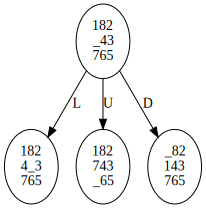

In [19]:
def expand(dot, n):
  successors = n.get_successors()
  for s in successors:
    s.draw(dot)

n = Node([[1, 8, 2],
          [0, 4, 3],
          [7, 6, 5]])
dot = Digraph()
n.draw(dot)
expand(dot, n)

dot

## Implement graph-search

Complete TODO 4

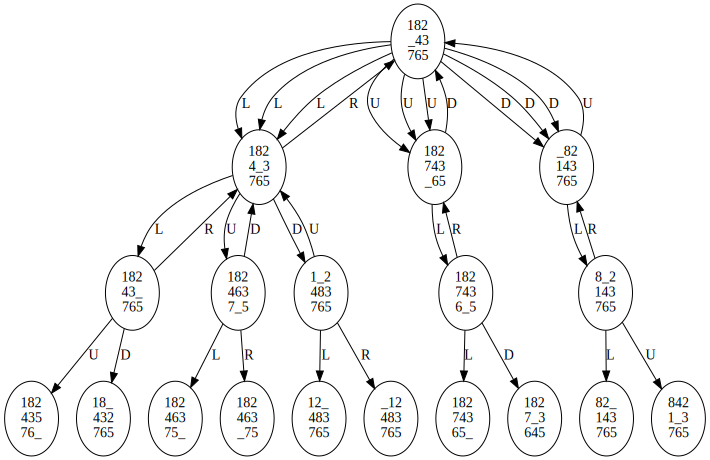

In [30]:
def graph_search(node, max_num_nodes = 20):
  dot = Digraph()
  frontier = list()
  explored = set()
  frontier.append(node)
  count = 0

  while len(frontier) > 0 and count < max_num_nodes:
    '''
    # TODO 4
    Complete the body of the loop statement regarding the graph-search algorithm.
    The output is an example of the tree expanded the the process.
    '''

    curr_node = frontier.pop(0)

    if curr_node in explored:
      continue

    explored.add(curr_node)
    count+=1
    curr_node.draw(dot)
    successors = curr_node.get_successors()
    for succ in successors:

      frontier.append(succ)





  return dot

n = Node([[1, 8, 2],
          [0, 4, 3],
          [7, 6, 5]])
dot = graph_search(n, 33)
dot